In [39]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

In [2]:
data = pd.read_csv('bank_with_missing.csv')
print("Dataset preview:")
data.head()

Dataset preview:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,NaN,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
data.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [5]:
data.isnull().sum()

age          100
job          120
marital        0
education      0
default        0
balance       80
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [6]:
data.shape

(45211, 17)

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45111 non-null  float64
 1   job        45091 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45131 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.9+ MB


In [9]:
data['age'] = data['age'].fillna(data['age'].mean())
display(data.isnull().sum())

age            0
job          120
marital        0
education      0
default        0
balance       80
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [10]:
data['job'] = data['job'].fillna(data['job'].mode()[0])
display(data.isnull().sum())

age           0
job           0
marital       0
education     0
default       0
balance      80
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [11]:
data.dropna(subset=['balance'], inplace=True)
display(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
data.shape

(45131, 17)

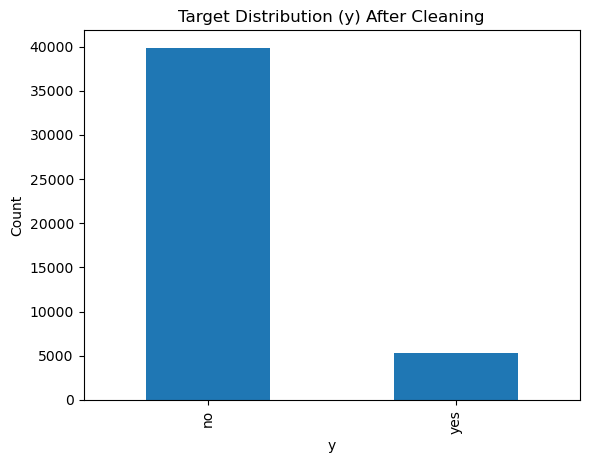

In [13]:
plt.figure()
data['y'].value_counts().plot(kind='bar')
plt.title("Target Distribution (y) After Cleaning")
plt.xlabel("y")
plt.ylabel("Count")
plt.show()

In [14]:
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])
display(data['y'].value_counts())

y
0    39856
1     5275
Name: count, dtype: int64

In [38]:
y_classes = label_encoder.classes_

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.000000,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44.000000,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33.000000,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47.000000,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,40.937399,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [16]:
x_raw = data.drop(['y'], axis=1)
y = data['y']
x = pd.get_dummies(x_raw, drop_first=True)
x = x.astype(int)

In [17]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,40,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((36104, 42), (9027, 42), (36104,), (9027,))

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [37]:
X_features = scaler.get_feature_names_out()

### Logistic Regression

In [21]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

In [23]:
accuracy_score(y_train, y_pred_train)

0.9021992023044538

In [32]:
accuracy_score(y_test, y_pred_test)

0.9008529965658579

In [26]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31884
           1       0.65      0.35      0.45      4220

    accuracy                           0.90     36104
   macro avg       0.79      0.66      0.70     36104
weighted avg       0.89      0.90      0.89     36104



In [27]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7972
           1       0.63      0.37      0.47      1055

    accuracy                           0.90      9027
   macro avg       0.77      0.67      0.71      9027
weighted avg       0.89      0.90      0.89      9027



### Decision Tree

In [28]:
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 42)

In [29]:
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [30]:
y_pred_train1 = tree_model.predict(X_train_scaled)
y_pred_test1 = tree_model.predict(X_test_scaled)

In [32]:
accuracy_score(y_train, y_pred_train1)

0.9050520717925992

In [33]:
accuracy_score(y_test, y_pred_test1)

0.8995236512684169

In [34]:
print(classification_report(y_train, y_pred_train1))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31884
           1       0.67      0.37      0.47      4220

    accuracy                           0.91     36104
   macro avg       0.80      0.67      0.71     36104
weighted avg       0.89      0.91      0.89     36104



In [36]:
print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7972
           1       0.62      0.36      0.46      1055

    accuracy                           0.90      9027
   macro avg       0.77      0.67      0.70      9027
weighted avg       0.89      0.90      0.89      9027



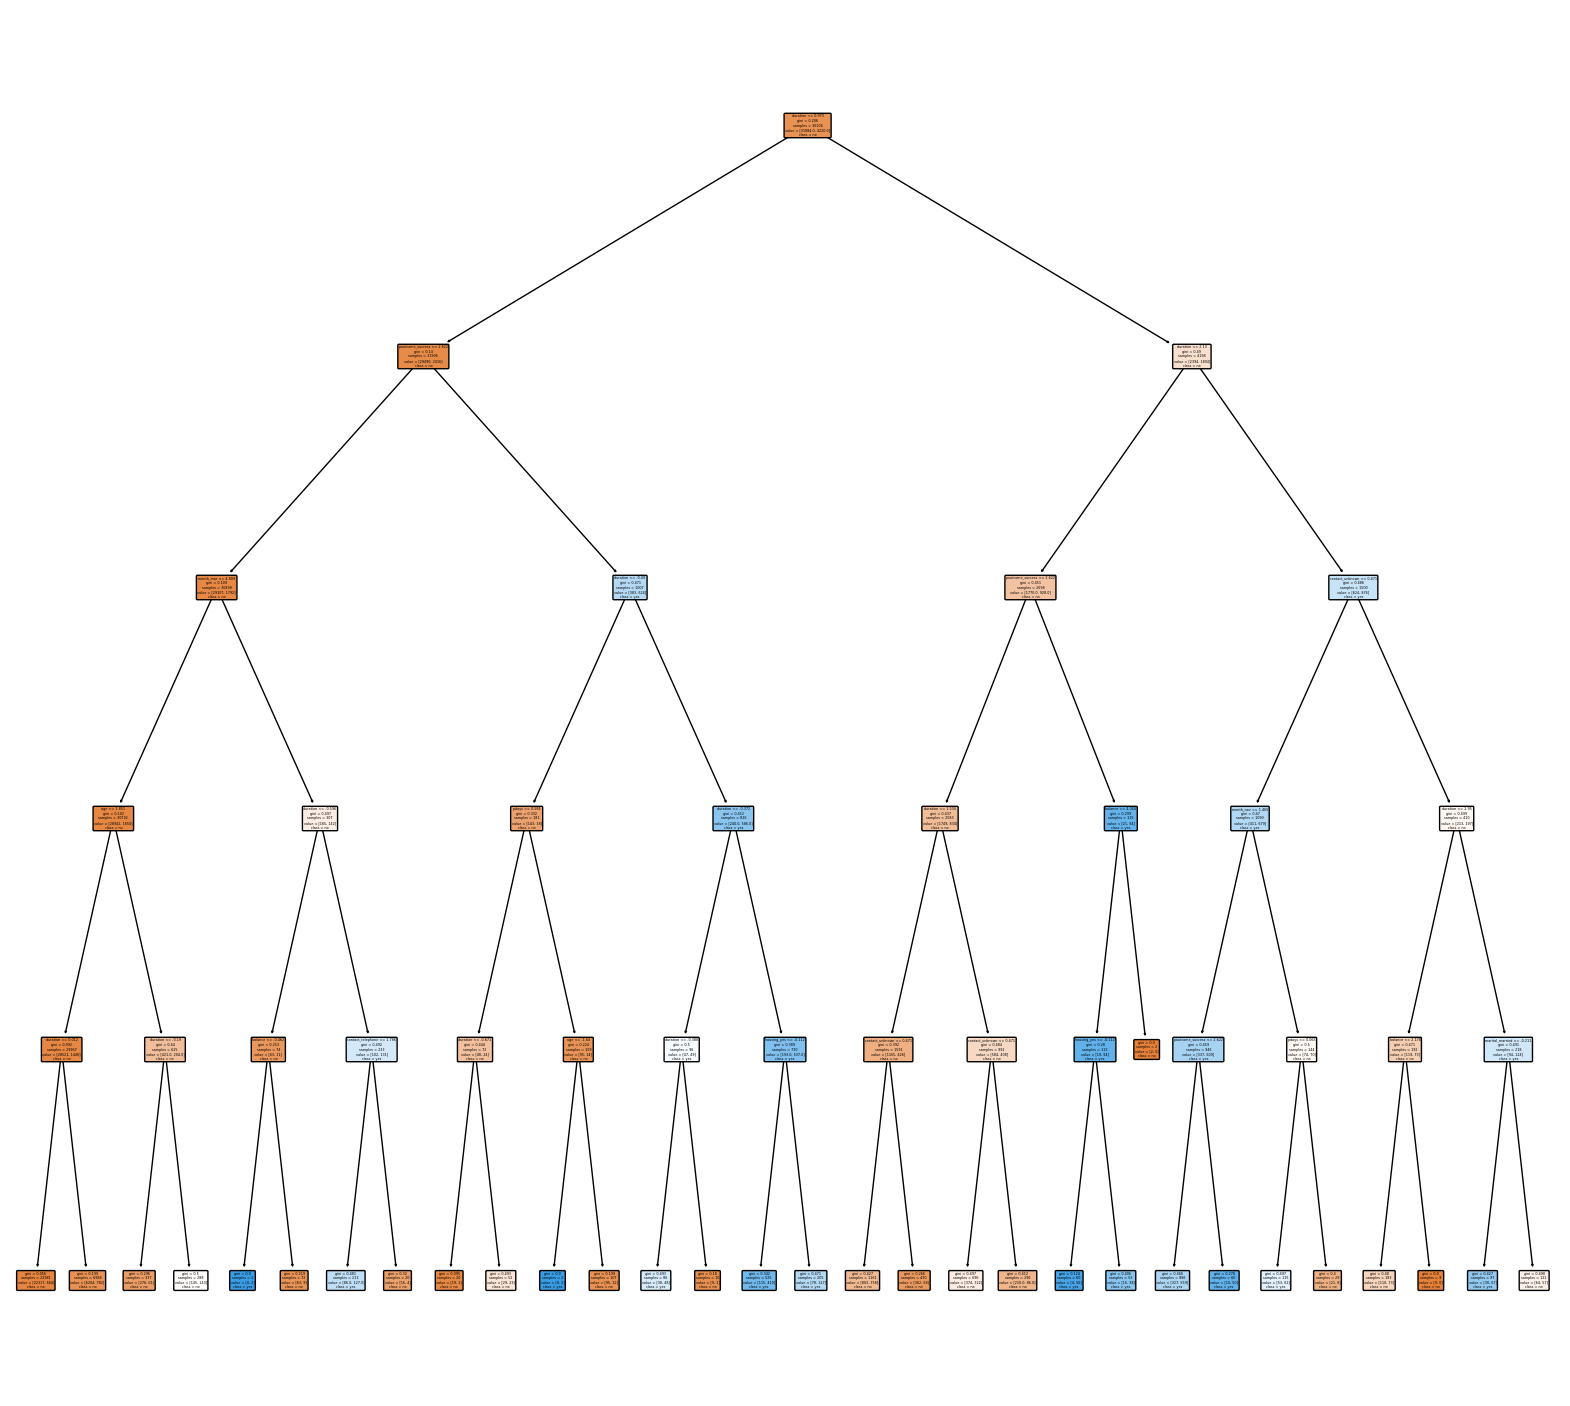

In [49]:
plt.figure(figsize = (20,18))
plot_tree(tree_model,
         feature_names = X_features,
         class_names = y_classes,
         filled = True,
         rounded = True)
plt.show()

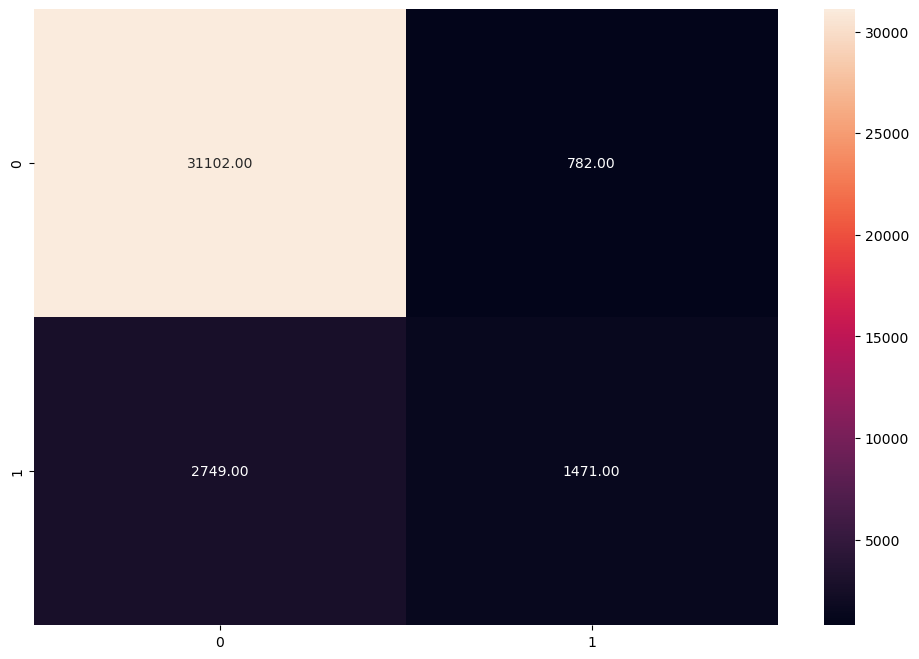

In [44]:

plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot = True, fmt = '.2f')
plt.show()

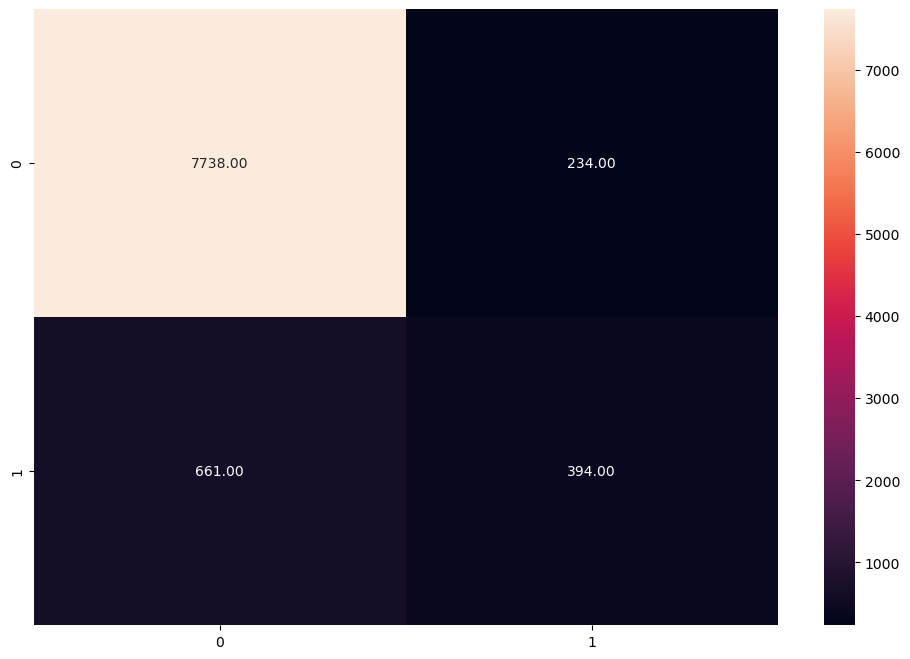

In [45]:
plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, fmt = '.2f')
plt.show()

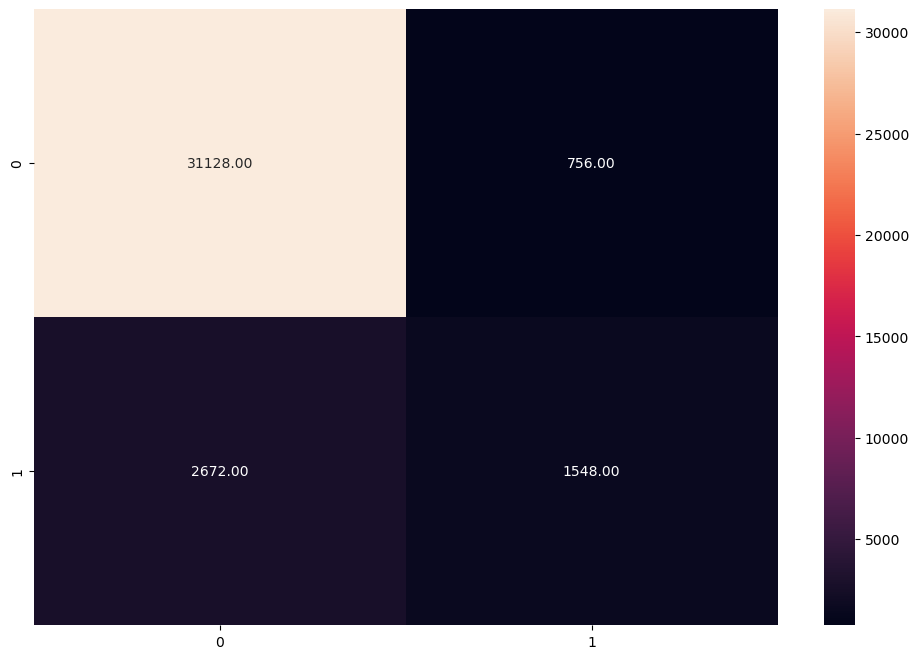

In [46]:
plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_train, y_pred_train1), annot = True, fmt = '.2f')
plt.show()

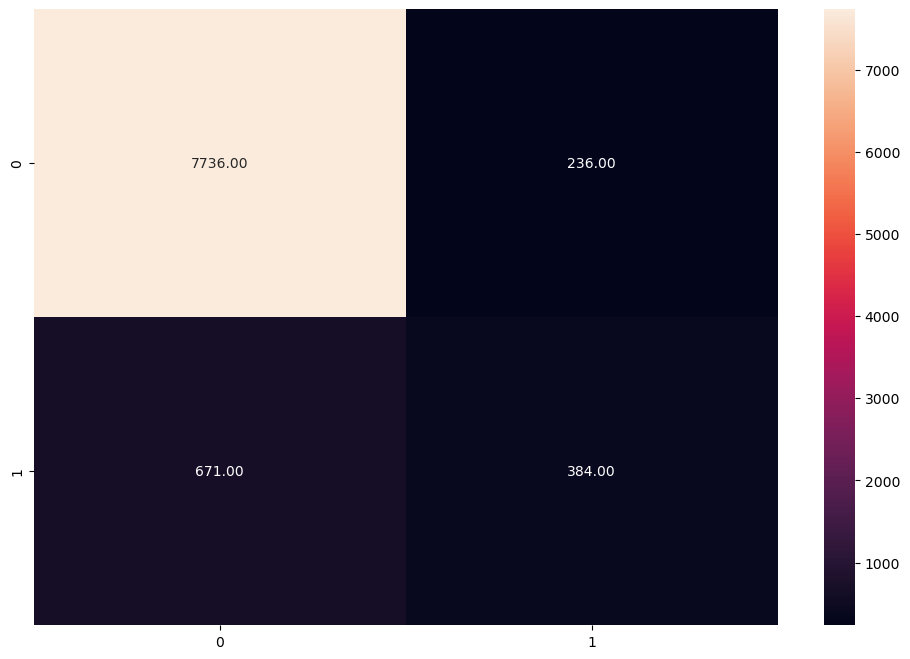

In [47]:
plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_test1), annot = True, fmt = '.2f')
plt.show()

In [51]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_test)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_test1)
auc_log = roc_auc_score(y_test, y_pred_test)
auc_tree = roc_auc_score(y_test, y_pred_test1)

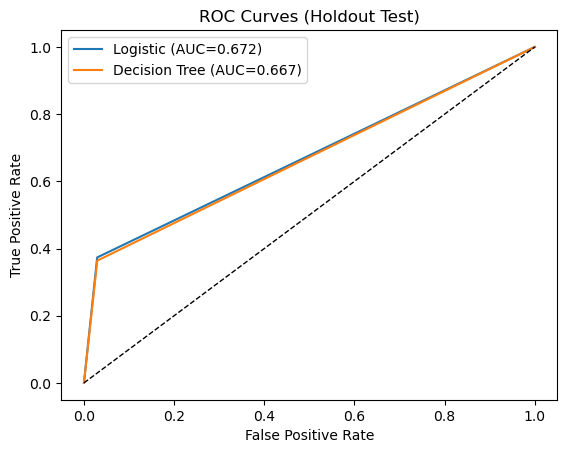

In [52]:
plt.figure()
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC={auc_log:.3f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC={auc_tree:.3f})")
plt.plot([0,1], [0,1], 'k--', linewidth=1)   # ✅ fixed line — properly closed brackets
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Holdout Test)")
plt.legend()
plt.show()